<a href="https://colab.research.google.com/github/SebastianArriagadaS/unsupervised_ml/blob/main/Unsupervized_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image classification using deep clustering
The purpose of the project is to use unsupervised image classification techniques on the German traffic sign dataset. A comparison between different state-of-the-art models is required regarding the accuracy, A theoretical comparison justifying the choice of the model is also acceptable.

## Packages

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Supervized

In [ ]:
nb_class = 43

### Train

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [ ]:
path = '/content/gdrive/MyDrive/Cours/MAM5A/ELTE/Advanced Machine Learning/Unsupervized Clustering on Image/data/'
df_train = pd.read_csv(path + 'Train.csv')
df_train.head() 

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [ ]:
print(df_train.shape)
df_train = df_train[df_train['ClassId'] < nb_class]
print(df_train.shape)

(39209, 8)
(39209, 8)


In [ ]:
df_train['Path']=df_train.Path.apply(lambda x: path + x)
df_train['ClassId']=df_train.ClassId.astype(str)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39209 entries, 0 to 39208
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    39209 non-null  int64 
 1   Height   39209 non-null  int64 
 2   Roi.X1   39209 non-null  int64 
 3   Roi.Y1   39209 non-null  int64 
 4   Roi.X2   39209 non-null  int64 
 5   Roi.Y2   39209 non-null  int64 
 6   ClassId  39209 non-null  object
 7   Path     39209 non-null  object
dtypes: int64(6), object(2)
memory usage: 2.7+ MB


In [ ]:
width, height = 50,50
trainDatagen = datagen.flow_from_dataframe(df_train, directory=None, x_col='Path', y_col='ClassId',
                                           target_size=(width,height), class_mode = 'categorical', batch_size = 16, 
                                           subset='training')

x, y = trainDatagen.next()
x.shape, y.shape

Found 31368 validated image filenames belonging to 43 classes.


((16, 50, 50, 3), (16, 43))

### Test

In [ ]:
path = '/content/gdrive/MyDrive/Cours/MAM5A/ELTE/Advanced Machine Learning/Unsupervized Clustering on Image/data/'
df_test = pd.read_csv(path + 'Test.csv')
df_test.head() 

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [ ]:
print(df_test.shape)
df_test = df_test[df_test['ClassId'] < nb_class]
print(df_test.shape)

(12630, 8)
(12630, 8)


In [ ]:
df_test['Path']=df_test.Path.apply(lambda x: path + x)
df_test['ClassId']=df_test.ClassId.astype(str)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39209 entries, 0 to 39208
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    39209 non-null  int64 
 1   Height   39209 non-null  int64 
 2   Roi.X1   39209 non-null  int64 
 3   Roi.Y1   39209 non-null  int64 
 4   Roi.X2   39209 non-null  int64 
 5   Roi.Y2   39209 non-null  int64 
 6   ClassId  39209 non-null  object
 7   Path     39209 non-null  object
dtypes: int64(6), object(2)
memory usage: 2.7+ MB


In [ ]:
width, height = 50,50
testDatagen = datagen.flow_from_dataframe(df_test, directory=None, x_col='Path', y_col='ClassId',
                                           target_size=(width,height), class_mode = 'categorical', batch_size = 16, 
                                           subset='training')

x, y = testDatagen.next()
x.shape, y.shape

Found 10104 validated image filenames belonging to 43 classes.


((16, 50, 50, 3), (16, 43))

### Arbiratory CNN

In [ ]:
from tensorflow.keras import models, layers

In [ ]:
model = models.Sequential() #Sequential Model

#ConvLayer(64 filters) + MaxPooling + BatchNormalization + Dropout
model.add(layers.Conv2D(filters=32,kernel_size=3,activation='relu',padding='same',input_shape=(50, 50, 3)))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

#Flatten
model.add(layers.Flatten())

#Dense layer with 1000 hidden units
model.add(layers.Dense(1000,activation='relu'))

#Softmax layer for output
model.add(layers.Dense(nb_class,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 25, 25, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 25, 25, 32)        0         
                                                                 
 flatten (Flatten)           (None, 20000)             0         
                                                                 
 dense (Dense)               (None, 1000)              2

In [ ]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history= model.fit(trainDatagen, epochs=20, batch_size=64,
                 validation_data=testDatagen)

Epoch 1/20
 180/1961 [=>............................] - ETA: 3:42:31 - loss: 3.2381 - accuracy: 0.4868

KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Modelaccuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train","Test"],loc="upper left")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(["Train","Test"],loc="upper left")
plt.show()

NameError: ignored

## Unsupervized

In [ ]:
%matplotlib inline

import time
import os, os.path
from os import listdir
import random
import cv2
import glob
import keras
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

import pandas as pd
import numpy as np

### Load test/train Data

In [154]:
def dataset_stats(directory_path):    
    # dictionary where we will store the stats
    stats = []
    
    for sub_directory in directory_path:
      file_names = [file for file in listdir(sub_directory)]
      file_count = len(file_names)
      stats.append({"Image count": file_count, 
                      "Folder name": os.path.basename(sub_directory),
                      "File names": file_names})

    
    df = pd.DataFrame(stats)
    
    return df

In [155]:
def load_images_labels(DIR):
  directory_list = listdir(DIR)

  directory_path = []
  for l in directory_list:
    directory_path.append(DIR + l)
  dataset = dataset_stats(directory_path)
  dataset["Folder name"] = pd.to_numeric(dataset["Folder name"])
  dataset = dataset.sort_values(by = "Folder name")
  dataset["Folder name"] = dataset["Folder name"].astype(str)

  path = DIR[:105]
  df_train = pd.read_csv(path + DIR[105:-1] + '.csv')
  df_train = df_train.sample(frac=1).reset_index(drop=True)

  list_images = []
  labels = []
  for image in df_train.loc[0:, 'Path']:
    img = plt.imread(path + image)
    img = cv2.resize(img, (32,32))
    list_images.append(img)

    labels.append(image[6:-22])

  images = np.array(list_images)
  labels = np.array(labels)
  print(images.shape, labels.shape)

  return images, labels

In [156]:
def show_random_images(images, labels, number_of_images_to_show=2):

    for code in list(set(labels)):

        indicies = [i for i, label in enumerate(labels) if label == code]
        random_indicies = [random.choice(indicies) for i in range(number_of_images_to_show)]
        figure, axis = plt.subplots(1, number_of_images_to_show)

        print("{} random images for code {}".format(number_of_images_to_show, code))

        for image in range(number_of_images_to_show):
            axis[image].imshow(images[random_indicies[image]])
        plt.show()

#### Train

In [157]:
DIR = "/content/gdrive/MyDrive/Cours/MAM5A/ELTE/Advanced Machine Learning/Unsupervized Clustering on Image/data/Train/"
images, labels = load_images_labels(DIR)

(39209, 32, 32, 3) (39209,)


2 random images for code 25


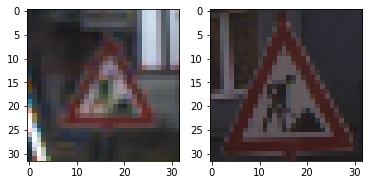

2 random images for code 16


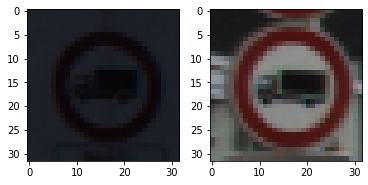

2 random images for code 19


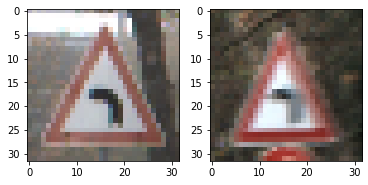

2 random images for code 13


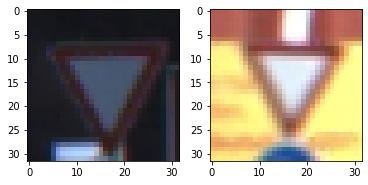

2 random images for code 15


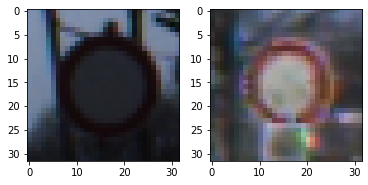

2 random images for code 5


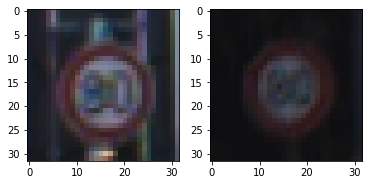

2 random images for code 24


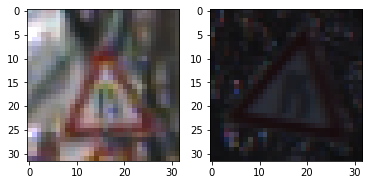

2 random images for code 20


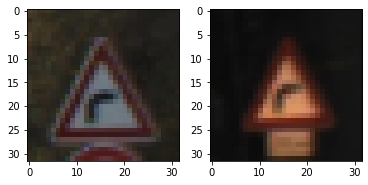

2 random images for code 37


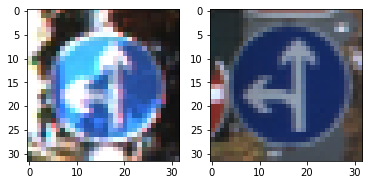

2 random images for code 11


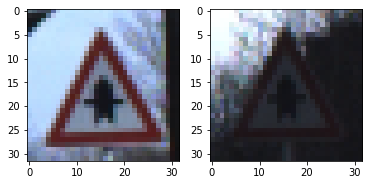

2 random images for code 38


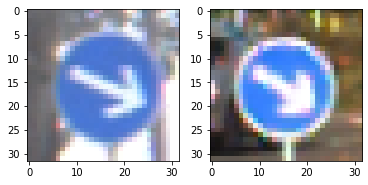

2 random images for code 7


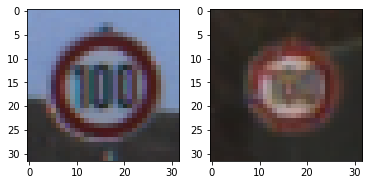

2 random images for code 3


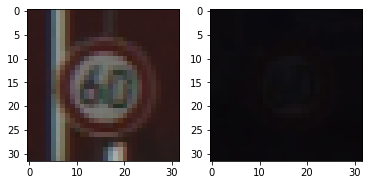

2 random images for code 2


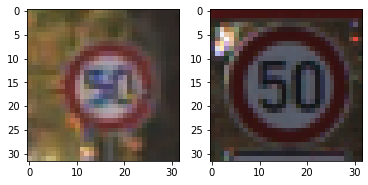

2 random images for code 42


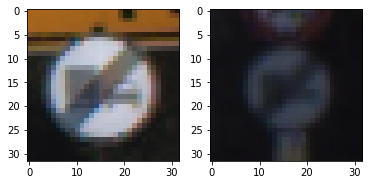

2 random images for code 33


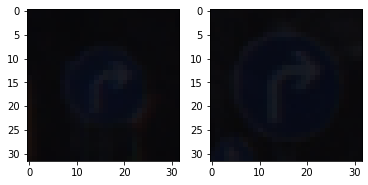

2 random images for code 41


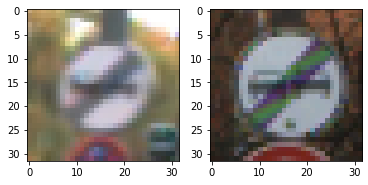

2 random images for code 14


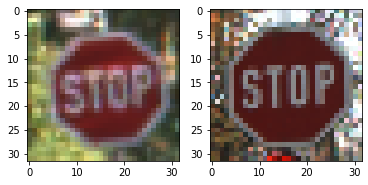

2 random images for code 10


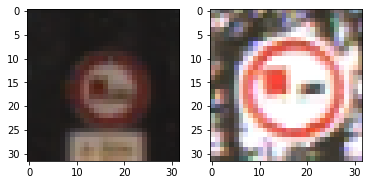

2 random images for code 32


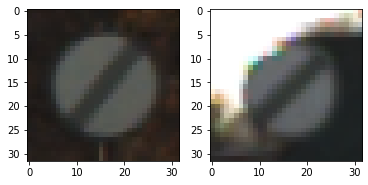

2 random images for code 35


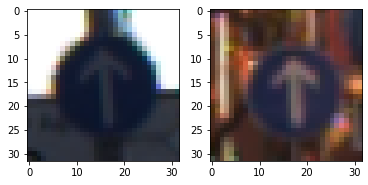

2 random images for code 21


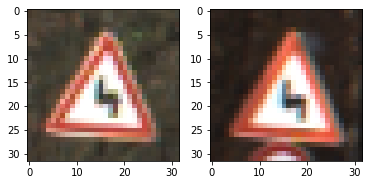

2 random images for code 18


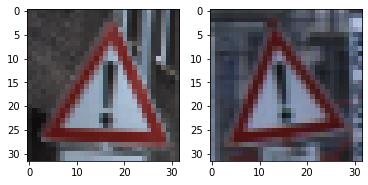

2 random images for code 4


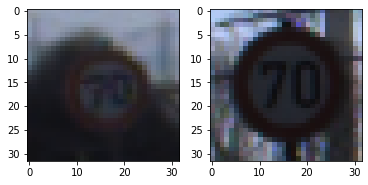

2 random images for code 22


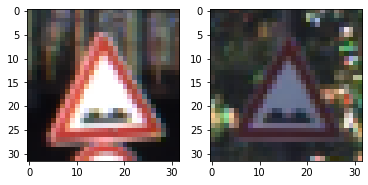

2 random images for code 30


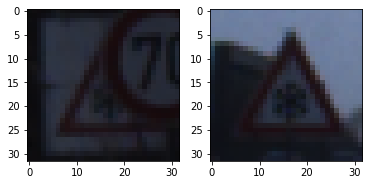

2 random images for code 17


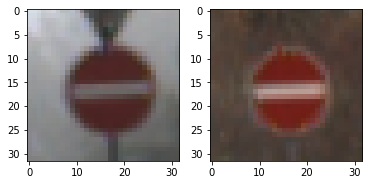

2 random images for code 9


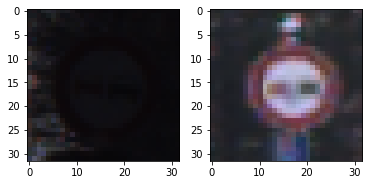

2 random images for code 0


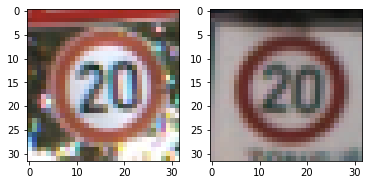

2 random images for code 39


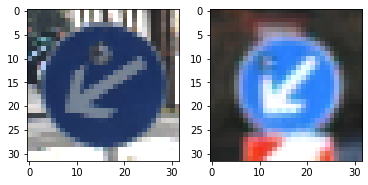

2 random images for code 29


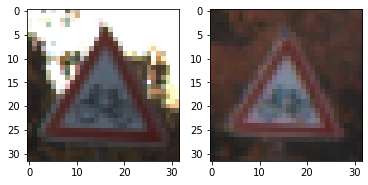

2 random images for code 6


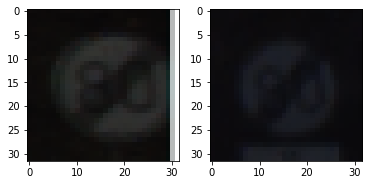

2 random images for code 26


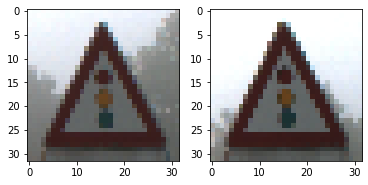

2 random images for code 40


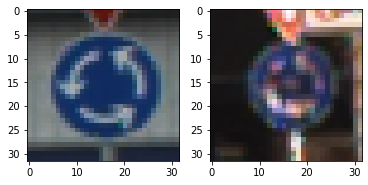

2 random images for code 36


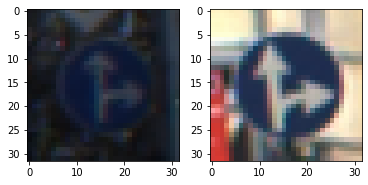

2 random images for code 23


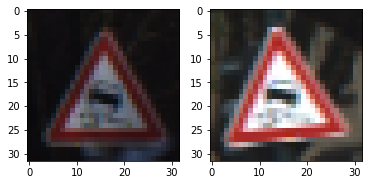

2 random images for code 1


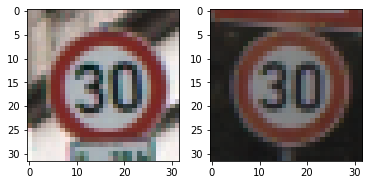

2 random images for code 27


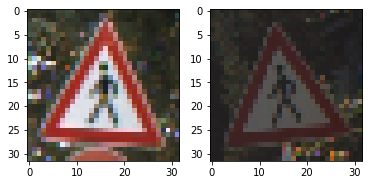

2 random images for code 8


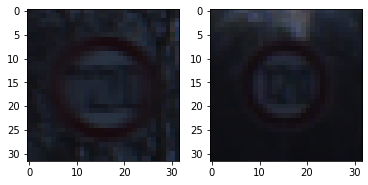

2 random images for code 31


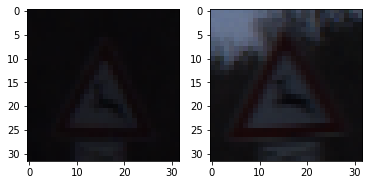

2 random images for code 12


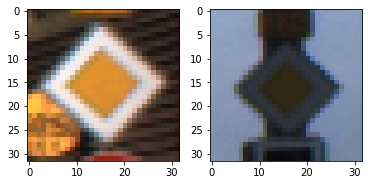

2 random images for code 28


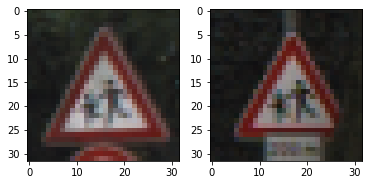

2 random images for code 34


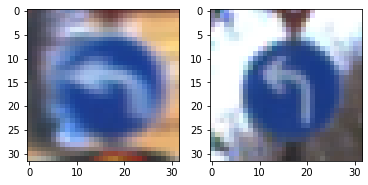

In [158]:
show_random_images(images, labels)

#### Test

In [159]:
DIR = "/content/gdrive/MyDrive/Cours/MAM5A/ELTE/Advanced Machine Learning/Unsupervized Clustering on Image/data/Test/"

images_test = []
for image in [f for f in listdir(DIR) if os.path.isfile(os.path.join(DIR, f))]:
    img = plt.imread(DIR + image)
    img = cv2.resize(img, (32,32))
    images_test.append(img)

images_test = np.array(images_test)
print(images_test.shape)

(85, 32, 32, 3)


### Preprocessing 

We now convert the images and labels to NumPy arrays to make processing them easier. We then normaise the images before passing them on to VGG19

In [160]:
def normalise_images(images, labels):
    # Convert to numpy arrays
    images = np.array(images, dtype=np.float32)
    labels = np.array(labels)

    # Normalise the images
    images /= 255
    
    return images, labels

In [161]:
images, labels = normalise_images(images, labels)

Now that we have all the photos and their labels in arrays. It's time to shuffle them around, and split them to two different sets : training, validation and we already have testing.

We'll be using the train_test_split function from sklearn which will also shuffle the data around for us, since it's currently in order.

In [162]:
X_train, X_valid, y_train, y_valid = train_test_split(images, labels, test_size=0.2, random_state=728)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(31367, 32, 32, 3) (7842, 32, 32, 3) (31367,) (7842,)


### Pretrained Models to encode

VGG16, VG19, ResNet50

We'll now load up the keras models with the imagenet weights. We'll remove the top dense layers, since we won't need to classify things here, and we just want these encoded features from the images.

In [163]:
# Load the models with ImageNet weights
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50

vgg16_model = VGG16(include_top=False, weights="imagenet", input_shape=(32,32,3))
vgg19_model = VGG19(include_top=False, weights="imagenet", input_shape=(32,32,3))
resnet50_model = ResNet50(include_top=False, weights="imagenet", input_shape=(32,32,3))

The covnet models will give us 3D vectors that represent the image. We need to flatten these for the clustering algorithms to start working with them.

In [164]:
def covnet_transform(covnet_model, raw_images):
    # Pass our training data through the network
    pred = covnet_model.predict(raw_images)

    # Flatten the array
    flat = pred.reshape(raw_images.shape[0], -1)
    
    return flat

In [165]:
vgg16_output = covnet_transform(vgg16_model, X_train)
print("VGG16 flattened output has {} features".format(vgg16_output.shape[1]))

vgg19_output = covnet_transform(vgg19_model, X_train)
print("VGG19 flattened output has {} features".format(vgg19_output.shape[1]))

resnet50_output = covnet_transform(resnet50_model, X_train)
print("ResNet50 flattened output has {} features".format(resnet50_output.shape[1]))

981/981 [==============================] - 373s 379ms/step
VGG16 flattened output has 512 features
981/981 [==============================] - 471s 480ms/step
VGG19 flattened output has 512 features
981/981 [==============================] - 161s 163ms/step
ResNet50 flattened output has 2048 features


The above cell shows us the number of features each covnet gives to a single image. When we compare these to the original size of the image 32 x 32 x 3 = 3072 pixels/features, we can see that this is a large reduction in what the clustering algorithms will have to work with.

Hopefully these reduces number of feature are represent more meaningful features in the image structure.

### PCA

While k-means clustering has coped with these numbers, Gaussian Mixture Modelling has not and the computer consistently ran out of memory and struggled to produce results.

We therefore look to PCA for dimensionality reduction, so that our clustering algorithms can cope.

In [166]:
# Function that creates a PCA instance, fits it to the data and returns the instance
def create_fit_PCA(data, n_components=None):
    p = PCA(n_components=n_components, random_state=728)
    p.fit(data)
    return p

In [167]:
# Create PCA instances for each covnet output
vgg16_pca = create_fit_PCA(vgg16_output)
vgg19_pca = create_fit_PCA(vgg19_output)
resnet50_pca = create_fit_PCA(resnet50_output)

In [168]:
# Function to plot the cumulative explained variance of PCA components
# This will help us decide how many components we should reduce our features to
def pca_cumsum_plot(pca):
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()

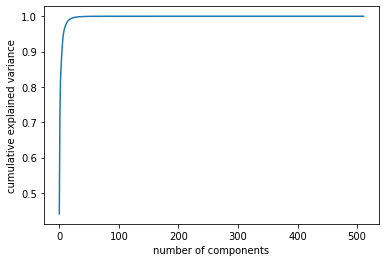

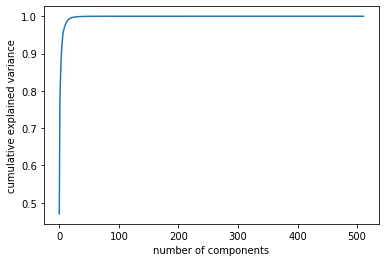

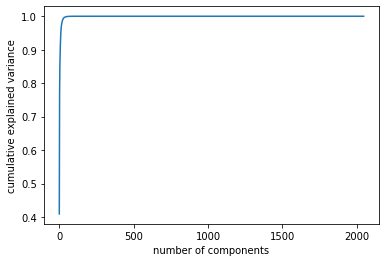

In [169]:
# Plot the cumulative explained variance for each covnet
pca_cumsum_plot(vgg16_pca)
pca_cumsum_plot(vgg19_pca)
pca_cumsum_plot(resnet50_pca)

Looking at the gaphs above, we can see that PCA can explain almost all the variance in as many dimensions as there are samples.

It is also interesting to note the difference in shape between the VGG graphs and the ResNet one. This is probably due to the fact that ResNet only had 2048 dimensions to start with, while VGGs had 25,088

In [170]:
# PCA transformations of covnet outputs
vgg16_output_pca = vgg16_pca.transform(vgg16_output)
vgg19_output_pca = vgg19_pca.transform(vgg19_output)
resnet50_output_pca = resnet50_pca.transform(resnet50_output)

### Kmeans

Let's write a couple of functions that would create and fit KMeans.

In [171]:
def create_train_kmeans(data, number_of_clusters=len(dataset['Folder name'])):
    # n_jobs is set to -1 to use all available CPU cores. This makes a big difference on an 8-core CPU
    # especially when the data size gets much bigger. #perfMatters
    
    k = KMeans(n_clusters=number_of_clusters, random_state=728)

    # Let's do some timings to see how long it takes to train.
    start = time.time()

    # Train it up
    k.fit(data)

    # Stop the timing 
    end = time.time()

    # And see how long that took
    print("Training took {} seconds".format(end-start))
    
    return k

In [172]:
# Let's pass the data into the algorithm and predict who lies in which cluster. 
# Since we're using the same data that we trained it on, this should give us the training results.

# Here we create and fit a KMeans model with the PCA outputs
print("KMeans (PCA): \n")

print("VGG16")
K_vgg16_pca = create_train_kmeans(vgg16_output_pca)

print("\nVGG19")
K_vgg19_pca = create_train_kmeans(vgg19_output_pca)

print("\nResNet50")
K_resnet50_pca = create_train_kmeans(resnet50_output_pca)

KMeans (PCA): 

VGG16
Training took 229.733580827713 seconds

VGG19
Training took 155.40584874153137 seconds

ResNet50
Training took 1323.4696152210236 seconds


In [173]:
# Let's also create models for the covnet outputs without PCA for comparison
print("KMeans: \n")

print("VGG16:")
K_vgg16 = create_train_kmeans(vgg16_output)

print("\nVGG19:")
K_vgg19 = create_train_kmeans(vgg19_output)

print("\nResNet50:")
K_resnet50 = create_train_kmeans(resnet50_output)

KMeans: 

VGG16:
Training took 118.5653612613678 seconds

VGG19:
Training took 125.92157769203186 seconds

ResNet50:
Training took 373.86794877052307 seconds


In [ ]:
# Now we get the custer model predictions

# KMeans with PCA outputs
k_vgg16_pred_pca = K_vgg16_pca.predict(vgg16_output_pca)
k_vgg19_pred_pca = K_vgg19_pca.predict(vgg19_output_pca)
k_resnet50_pred_pca = K_resnet50_pca.predict(resnet50_output_pca)

# KMeans with CovNet outputs (without PCA)
k_vgg16_pred = K_vgg16.predict(vgg16_output)
k_vgg19_pred = K_vgg19.predict(vgg19_output)
k_resnet50_pred = K_resnet50.predict(resnet50_output)

The clustering algorith does not detect which images are which in term how labels, it only groups images that look alike together and assigns them a number arbitrarily.

We now need to count how many of each label are in each cluster, this way we can take a look and if sufficient eperation has happened we can quicly see which cluster is which label. So let's write a function that does that.


### Trying to get the cluster names back

In [175]:
def cluster_label_count(clusters, labels):
    
    count = {}
    
    # Get unique clusters and labels
    unique_clusters = list(set(clusters))
    unique_labels = list(set(labels))
    
    # Create counter for each cluster/label combination and set it to 0
    for cluster in unique_clusters:
        count[cluster] = {}
        
        for label in unique_labels:
            count[cluster][label] = 0
    
    # Let's count
    for i in range(len(clusters)):
        count[clusters[i]][labels[i]] +=1
    
    cluster_df = pd.DataFrame(count)
    
    return cluster_df

In [176]:
# Cluster counting for VGG16 KMeans
vgg16_cluster_count = cluster_label_count(k_vgg16_pred, y_train)
vgg16_cluster_count_pca = cluster_label_count(k_vgg16_pred_pca, y_train)

# VGG19 KMeans
vgg19_cluster_count = cluster_label_count(k_vgg19_pred, y_train)
vgg19_cluster_count_pca = cluster_label_count(k_vgg19_pred_pca, y_train)

# ResNet50 KMeans
resnet_cluster_count = cluster_label_count(k_resnet50_pred, y_train)
resnet_cluster_count_pca = cluster_label_count(k_resnet50_pred_pca, y_train)

### Accuracy

In [211]:
print("KMeans VGG16: ")
cm_argmax = vgg16_cluster_count.idxmax(axis=0)
pred_ = np.array([cm_argmax[i] for i in k_vgg16_pred])
print(accuracy_score(y_train,pred_))

print("KMeans VGG16 (PCA): ")
cm_argmax = vgg16_cluster_count_pca.idxmax(axis=0)
pred_ = np.array([cm_argmax[i] for i in k_vgg16_pred_pca])
print(accuracy_score(y_train,pred_))

############
print("\n KMeans VGG19: ")
cm_argmax = vgg19_cluster_count.idxmax(axis=0)
pred_ = np.array([cm_argmax[i] for i in k_vgg19_pred])
print(accuracy_score(y_train,pred_))

print("KMeans VGG16: ")
cm_argmax = vgg19_cluster_count_pca.idxmax(axis=0)
pred_ = np.array([cm_argmax[i] for i in k_vgg19_pred_pca])
print(accuracy_score(y_train,pred_))

###########

print("\n KMeans Resnet50: ")
cm_argmax = resnet_cluster_count.idxmax(axis=0)
pred_ = np.array([cm_argmax[i] for i in k_resnet50_pred])
print(accuracy_score(y_train,pred_))

print("Kmeans Resnet50 (PCA): ")
cm_argmax = resnet_cluster_count_pca.idxmax(axis=0)
pred_ = np.array([cm_argmax[i] for i in k_resnet50_pred_pca])
print(accuracy_score(y_train,pred_))

KMeans VGG16: 
0.15376032135683998
KMeans VGG16 (PCA): 
0.153728440717952

 KMeans VGG19: 
0.14292090413491887
KMeans VGG16: 
0.14827685146810343

 KMeans Resnet50: 
0.07530206905346383
Kmeans Resnet50 (PCA): 
0.15650205630120828
